## 입력변수가 카테고리값인 경우

- 카테고리 변수
- 더미 변수
- 카테고리 변수 예시

---

### 00. Setting

In [1]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


---

### 01. 카테고리 변수

- 카테고리 값은 여러개의 다른 상태를 나타내는 값 ex) 혈액형 : A, B, O, AB


- 분석 시 편의상 0 (A), 1 (B), 2 (O), 3 (AB)과 같은 정수로 표현하지만 실제론 크기의 의미가 없음


- 2라는 값이 1보다 2배 더 크다는 뜻이 아니고 3이라는 값도 1보다 3배 더 크다는 뜻이 아님


- 회귀분석시 카테고리값은 꼭 카테고리로 안쓰여도 됨 (EDA를 통해 어떤식으로 표현하는것이 Performance가 잘 나올지 확인 후 그에 맞게 진행)

---

### 02. 더미 변수

#### 1. 정의

- 카테고리 값을 그냥 정수로 쓸때 회귀 분석 모형은 이 값을 크기를 가진 숫자로 인식할 수 있는 위험이 있음


-  보완하기 위해 0과 1 두 가지 값만 가지는 변수 형태를 더미변수라 함 (숫자로 인식할 수 있는 위험 제거)


- indicator variable, design variable, Boolean indicator, binary variable, treatment 라고도 함

#### 2. 생성 방법

- 카테고리 변수를 더미 변수로 만들 때는 보통 One-Hot-Encoding 방법을 사용


- 하나의 카테고리 값은 하나의 더미 변수가 됨

#### 3. 복수모형

- 더미 변수를 사용하면 카테고리 변수값에 따라 나눠진 여러 그룹이 데이터에 대해 각각 회귀 모형을 사용하는 것과 같음


- 이 회귀 모형들은 더미 변수의 사용 방법에 따라 공통 모수를 가짐

#### 1) 예시 1 : $y$가 카테고리 값을 가지는 변수 $x_1$에만 의존한다고 가정

$$ y = f(x_1) $$

(1) $\;x_1$은 다음과 같이  $d_1$, $d_2$, $d_3$ 라는 더미 변수로 표현

* $x_1 = A$ 이면  $\;d_1 = 1,\;\; d_2 = 0,\;\; d_3 = 0$


* $x_1 = B$ 이면  $\;d_1 = 0,\;\; d_2 = 1,\;\; d_3 = 0$


* $x_1 = C$ 이면  $\;d_1 = 0,\;\; d_2 = 0,\;\; d_3 = 1$

(2) 더미 변수를 사용한 선형 회귀 모형

$$ y = w_1 d_1 + w_2 d_2 + w_3 d_3  $$

(3) 더미 변수의 값을 대입

* $x_1 = A$, 즉, $\;d_1 = 1,\;\;  d_2 = 0,\;\;  d_3 = 0$ 이면 $ y = w_1 = w_{A} $ (w1은 w1에 해당하는 값들의 평균)


* $x_1 = B$, 즉, $\;d_1 = 0,\;\;  d_2 = 1,\;\;  d_3 = 0$ 이면 $ y = w_2 = w_{B} $


* $x_1 = C$, 즉, $\;d_1 = 0,\;\;  d_2 = 0,\;\;  d_3 = 1$ 이면 $ y = w_3 = w_{C} $



$\rightarrow$ 사실상 3개의 독립적인 0차 모형과 같음


$\rightarrow$ 더미 변수를 사용하는 경우에는 상수항을 사용하면 그룹의 수보다 모수의 수가 많아지므로 추정이 불가능

#### 2) 예시 2 : $y$가 카테고리 값을 가지는 변수 $x_1$과 실수 값을 가지는 변수 $x_2$에 의존한다고 가정 

(단 $x_2$가 $y$에 미치는 영향력이 $x_1$값에 따라서 달라지지 않는다고 가정)

$$ y = f(x_1) + w x_2 $$

(1) 더미 변수를 사용하여 다음과 같이 표현

$$ y = w_1 d_1 + w_2 d_2 + w_3 d_3 + w_4 x_2 $$

(2) 더미 변수 값을 대입

* $x_1 = A$, 즉, $\;d_1 = 1,\;\; d_2 = 0,\;\; d_3 = 0$ 이면 $ y = w_1 + w_4 x_2 $


* $x_1 = B$, 즉, $\;d_1 = 0,\;\; d_2 = 1,\;\; d_3 = 0$ 이면 $ y = w_2 + w_4 x_2 $


* $x_1 = C$, 즉, $\;d_1 = 0,\;\; d_2 = 0,\;\; d_3 = 1$ 이면 $ y = w_3 + w_4 x_2 $

$\rightarrow$ $x_2$에 의한 영향은 모두 공통, $\;x_1$에 의한 영향만 다른 세 개의 모형을 동시에 회귀분석하는 것과 같음

#### 2) 예시 3 : $y$가 카테고리 값을 가지는 변수 $x_1$과 실수 값을 가지는 변수 $x_2$에 의존한다고 가정 

(단 $x_2$가 $y$에 미치는 영향력이 $x_1$값에 따라서 달라진다고 가정)

$$ y = f(x_1) + w(x_1) x_2 $$

(1) $x_2$에 의한 영향이 공통적이지 않는 모형 만들기

$$ y = w_1 d_1 + w_2 d_2 + w_3 d_3 + w_4 d_1 x_2 + w_5 d_2 x_2 + w_6 d_3 x_2 $$

(2) 더미 변수 값을 대입

* $x_1 = A$, 즉, $\;d_1 = 1,\;\;  d_2 = 0,\;\;  d_3 = 0$ 이면 $ y = w_1 + w_4 x_2 $


* $x_1 = B$, 즉, $\;d_1 = 0,\;\;  d_2 = 1,\;\;  d_3 = 0$ 이면 $ y = w_2 + w_5 x_2 $


* $x_1 = C$, 즉, $\;d_1 = 0,\;\;  d_2 = 0,\;\;  d_3 = 1$ 이면 $ y = w_3 + w_6 x_2 $

---

### 03. 카테고리 변수 예시

#### 1. nottem 지역의 월별 기온 데이터

1) 데이터 카테고리화

In [2]:
df = sm.datasets.get_rdataset("nottem").data

In [3]:
# 시간 데이터를 파이썬 형태로 변환해야 할 필요성을 느낌
# nottem 데이터는 온도 데이터로 화씨(Fahrenheit) 단위
df.tail() 

,time,nottem
235,1939.583333,61.8
236,1939.666667,58.2
237,1939.750000,46.7
238,1939.833333,46.6
239,1939.916667,37.8


In [4]:
import datetime
from calendar import isleap

In [5]:
def convert_partial_year(number): # 시간 데이터 변형 함수
    year = int(number)
    d = datetime.timedelta(days=(number - year) * (365 + isleap(year)))
    day_one = datetime.datetime(year, 1, 1)
    date = d + day_one
    return date

In [6]:
df["date0"] = df[["time"]].applymap(convert_partial_year)
df["date"] = pd.DatetimeIndex(df["date0"]).round('60min') + datetime.timedelta(seconds=3600*24) 
df["month"] = df["date"].dt.strftime("%m").astype('category')
del df["date0"], df["date"] 

In [7]:
df.tail() # 함수를 통해 월 데이터 생성 (카테고리)

,time,nottem,month
235,1939.583333,61.8,08
236,1939.666667,58.2,09
237,1939.750000,46.7,10
238,1939.833333,46.6,11
239,1939.916667,37.8,12


2) 데이터 시각화

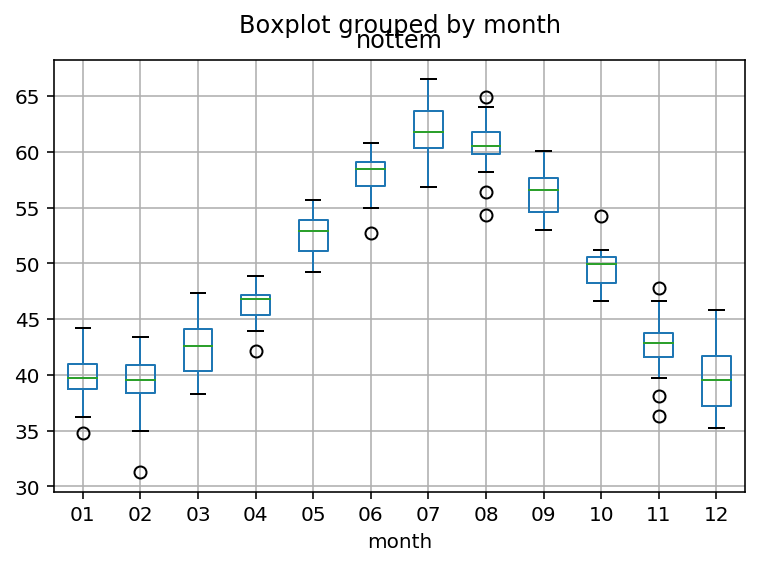

In [8]:
# boxplot으로 월별 온도 확인
df.boxplot("nottem", "month") 

plt.show()

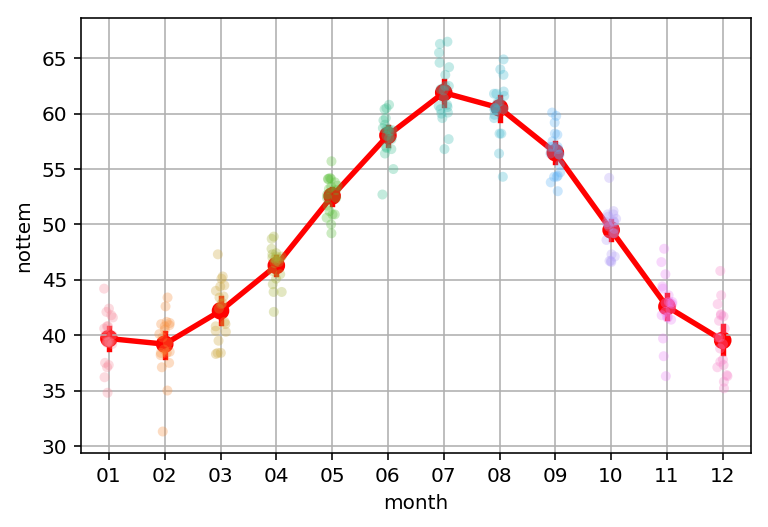

In [9]:
# stripplot으로 월별 온도 확인
sns.stripplot(x="month", y="nottem", data=df, jitter=True, alpha=.3)
sns.pointplot(x="month", y="nottem", data=df, dodge=True, color='r')

plt.grid(True)
plt.show()

3) 데이터 검정

In [10]:
model = sm.OLS.from_formula("nottem ~ C(month) + 0", df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 nottem   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     277.3
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          2.96e-125
Time:                        14:22:28   Log-Likelihood:                -535.82
No. Observations:                 240   AIC:                             1096.
Df Residuals:                     228   BIC:                             1137.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(month)[01]    39.6950      0.518     76.691   

---

#### 2. Boston 집값 데이터

1) 데이터 설명

- 보스턴 집값 데이터는 CHAS라는 카테고리 변수를 가짐


- 이 변수는 0과 1 두 개의 값(클래스)를 가지므로 이미 더미 변수로 변환되어 있는 것과 비슷

* `CHAS` = 1 인 경우 ( w_1= 찰스강 프리미엄 )


$$ y = w_0 + w_1 + w_ 2 \text{CRIM} + w_3 \text{ZN} + \cdots $$

* `CHAS` = 0 인 경우,


$$ y = w_0 + w_ 2 \text{CRIM} + w_3 \text{ZN} + \cdots $$

2) 데이터 불러오기

In [11]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston) # augmentation 추가
dfy_boston = pd.DataFrame(boston.target, columns=["MEDV"]) # y값 추가
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

3) 데이터 검정

In [12]:
model = sm.OLS(dfy_boston, dfX_boston)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 04 Mar 2018   Prob (F-statistic):          6.95e-135
Time:                        14:22:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

4) CHAS = 0 인 경우

In [13]:
params1 = result.params.drop("CHAS")
params1

const      36.491103
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

5) CHAS = 1 인 경우

In [14]:
params2 = params1.copy()
params2["const"] += result.params["CHAS"] # w1을 더해줌
params2

const      39.179665
CRIM       -0.107171
ZN          0.046395
INDUS       0.020860
NOX       -17.795759
RM          3.804752
AGE         0.000751
DIS        -1.475759
RAD         0.305655
TAX        -0.012329
PTRATIO    -0.953464
B           0.009393
LSTAT      -0.525467
dtype: float64

$\rightarrow$ 위 분석에서 두 데이터 그룹은 각각 39.18, 36.49 라는 상수항을 가지는 것을 알 수 있음